# Data Science as a Field Project

### Domain: Healthcare

### Team Members:
* Divya Nallawar
* Jeet Choksi
* Tanay Shukla

### Statement of the question of Interest
Based on different categories of Infants, determine the top 5 states with highest obesity?

### Source and short description of the data
The Women, Infant, and Children Participant and Program Characteristics (WIC-PC) dataset contains information on weight status for kids between the ages of 3 months and 4 years. The Data, Trends, and Maps database of the DNPAO uses this information to give data on obesity, nutrition, physical activity, and breastfeeding on a national and state level.

_Source of dataset:_ https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-women-infant-and-child


### Importing required libraries

In [19]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
from pandas.plotting import scatter_matrix

### Reading the CSV file using pandas

In [20]:
df = pd.read_csv("./Nutrition__Physical_Activity__and_Obesity_-_Women__Infant__and_Child.csv")
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2018,2018,WA,Washington,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,"(47.52227862900048, -120.47001078999972)",OWS,OWS1,Q060,VALUE,53,Age (months),18 - 23,AGEMO,AGEMO1823
1,2018,2018,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,"(21.304850435000446, -157.85774940299973)",OWS,OWS1,Q060,VALUE,15,Race/Ethnicity,Hispanic,RACE,RACEHIS
2,2020,2020,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(42.27687047000046, -72.08269067499964)",OWS,OWS1,Q040,VALUE,25,Race/Ethnicity,Hispanic,RACE,RACEHIS
3,2020,2020,TN,Tennessee,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(35.68094058000048, -85.77449091399967)",OWS,OWS1,Q040,VALUE,47,Race/Ethnicity,Hispanic,RACE,RACEHIS
4,2012,2012,GU,Guam,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q041,VALUE,66,Gender,Male,GEN,MALE


### Replacing the missing values with 0

In [21]:
df.fillna(0).head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2018,2018,WA,Washington,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,0.0,Value,...,"(47.52227862900048, -120.47001078999972)",OWS,OWS1,Q060,VALUE,53,Age (months),18 - 23,AGEMO,AGEMO1823
1,2018,2018,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,0.0,Value,...,"(21.304850435000446, -157.85774940299973)",OWS,OWS1,Q060,VALUE,15,Race/Ethnicity,Hispanic,RACE,RACEHIS
2,2020,2020,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,0.0,Value,...,"(42.27687047000046, -72.08269067499964)",OWS,OWS1,Q040,VALUE,25,Race/Ethnicity,Hispanic,RACE,RACEHIS
3,2020,2020,TN,Tennessee,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,0.0,Value,...,"(35.68094058000048, -85.77449091399967)",OWS,OWS1,Q040,VALUE,47,Race/Ethnicity,Hispanic,RACE,RACEHIS
4,2012,2012,GU,Guam,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,0.0,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q041,VALUE,66,Gender,Male,GEN,MALE


### Splitting the 'Question' column into two separate columns - 'Temp Column' and 'Category'

In [4]:
df[['Temp Column', 'Category']] = df['Question'].str.split('aged', expand = True)
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
0,2018,2018,WA,Washington,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,53,Age (months),18 - 23,AGEMO,AGEMO1823,Percent of WIC children,3-23 months old who have a high weight-for-le...
1,2018,2018,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,15,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,3-23 months old who have a high weight-for-le...
2,2020,2020,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,25,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have an overweight classific...
3,2020,2020,TN,Tennessee,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,47,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have an overweight classific...
4,2012,2012,GU,Guam,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,66,Gender,Male,GEN,MALE,Percent of WIC children,2 to 4 years who have obesity


### Filtering out the rows with no value in 'Data_Value' column

In [5]:
not_available = df['Data_Value_Footnote'] == "Data not available because sample size is insufficient."
df = df[~not_available]
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
0,2018,2018,WA,Washington,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,53,Age (months),18 - 23,AGEMO,AGEMO1823,Percent of WIC children,3-23 months old who have a high weight-for-le...
1,2018,2018,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,15,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,3-23 months old who have a high weight-for-le...
2,2020,2020,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,25,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have an overweight classific...
3,2020,2020,TN,Tennessee,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,47,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have an overweight classific...
4,2012,2012,GU,Guam,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,66,Gender,Male,GEN,MALE,Percent of WIC children,2 to 4 years who have obesity


### Converting the data type of 'Data_Value' column to float

In [6]:
df.Data_Value.astype(float)

0        13.7
1        10.2
2        17.6
3        18.9
4        12.0
         ... 
12847    13.3
12848    13.2
12849    14.8
12850    18.1
12851    18.5
Name: Data_Value, Length: 12473, dtype: float64

### Creating sub dataframe based on the filter - 'Category = 3-23 months old who have a high weight-for-length'

In [7]:
cat1 = df.query('Category==" 3-23 months old who have a high weight-for-length"')
cat1

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
0,2018,2018,WA,Washington,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,53,Age (months),18 - 23,AGEMO,AGEMO1823,Percent of WIC children,3-23 months old who have a high weight-for-le...
1,2018,2018,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,15,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,3-23 months old who have a high weight-for-le...
8,2020,2020,MN,Minnesota,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,27,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT,Percent of WIC children,3-23 months old who have a high weight-for-le...
9,2018,2018,WY,Wyoming,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,56,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,3-23 months old who have a high weight-for-le...
11,2018,2018,DE,Delaware,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,10,Gender,Female,GEN,FEMALE,Percent of WIC children,3-23 months old who have a high weight-for-le...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12837,2010,2010,TN,Tennessee,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,47,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,3-23 months old who have a high weight-for-le...
12839,2014,2014,RI,Rhode Island,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,44,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT,Percent of WIC children,3-23 months old who have a high weight-for-le...
12848,2016,2016,AR,Arkansas,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,5,Age (months),18 - 23,AGEMO,AGEMO1823,Percent of WIC children,3-23 months old who have a high weight-for-le...
12849,2016,2016,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,25,Gender,Male,GEN,MALE,Percent of WIC children,3-23 months old who have a high weight-for-le...


### Creating sub dataframe based on the filter - 'Category = 2 to 4 years who have an overweight classification'

In [8]:
cat2 = df.query('Category==" 2 to 4 years who have an overweight classification"')
cat2

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
2,2020,2020,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,25,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have an overweight classific...
3,2020,2020,TN,Tennessee,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,47,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have an overweight classific...
6,2018,2018,OH,Ohio,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,39,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have an overweight classific...
10,2018,2018,MT,Montana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,30,Age (months),36 - 47,AGEMO,AGEMO3647,Percent of WIC children,2 to 4 years who have an overweight classific...
14,2018,2018,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,15,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,2 to 4 years who have an overweight classific...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12840,2008,2008,GA,Georgia,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,13,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,2 to 4 years who have an overweight classific...
12841,2010,2010,IN,Indiana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,18,Gender,Female,GEN,FEMALE,Percent of WIC children,2 to 4 years who have an overweight classific...
12843,2016,2016,CT,Connecticut,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,9,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have an overweight classific...
12845,2014,2014,WA,Washington,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,53,Age (months),36 - 47,AGEMO,AGEMO3647,Percent of WIC children,2 to 4 years who have an overweight classific...


### Creating sub dataframe based on the filter - 'Category = 2 to 4 years who have obesity'

In [9]:
cat3 = df.query('Category==" 2 to 4 years who have obesity"')
cat3

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
4,2012,2012,GU,Guam,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,66,Gender,Male,GEN,MALE,Percent of WIC children,2 to 4 years who have obesity
5,2020,2020,HI,Hawaii,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,15,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have obesity
7,2018,2018,ME,Maine,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,23,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have obesity
12,2018,2018,ID,Idaho,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,16,Gender,Male,GEN,MALE,Percent of WIC children,2 to 4 years who have obesity
13,2018,2018,LA,Louisiana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,22,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,2 to 4 years who have obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,2008,2008,MT,Montana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,30,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK,Percent of WIC children,2 to 4 years who have obesity
12842,2010,2010,LA,Louisiana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,22,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,2 to 4 years who have obesity
12844,2010,2010,OK,Oklahoma,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,40,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,2 to 4 years who have obesity
12847,2012,2012,FL,Florida,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,12,Gender,Female,GEN,FEMALE,Percent of WIC children,2 to 4 years who have obesity


### Sorting values for the first sub dataframe based on 'Data_Value' column in descending order

In [10]:
newcat1 = cat1.sort_values(by = 'Data_Value', ascending = False)
newcat1

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
1799,2018,2018,VI,Virgin Islands,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,78,Age (months),3 - 5,AGEMO,AGEMO35,Percent of WIC children,3-23 months old who have a high weight-for-le...
12653,2008,2008,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,3-23 months old who have a high weight-for-le...
12241,2008,2008,VA,Virginia,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,51,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,3-23 months old who have a high weight-for-le...
5620,2010,2010,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,3-23 months old who have a high weight-for-le...
8307,2012,2012,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,3-23 months old who have a high weight-for-le...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12386,2014,2014,PR,Puerto Rico,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,72,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,3-23 months old who have a high weight-for-le...
6595,2012,2012,WY,Wyoming,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,56,Age (months),3 - 5,AGEMO,AGEMO35,Percent of WIC children,3-23 months old who have a high weight-for-le...
3745,2014,2014,WY,Wyoming,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,56,Age (months),3 - 5,AGEMO,AGEMO35,Percent of WIC children,3-23 months old who have a high weight-for-le...
12700,2016,2016,MT,Montana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,30,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,3-23 months old who have a high weight-for-le...


### Getting the top 5 unique states for the first sub dataframe

In [28]:
# top_states_cat1 = newcat1['LocationDesc'].unique().astype(str)[:5]
# top_states_cat1
top_states_cat1 = newcat1.drop_duplicates(subset=["LocationDesc"], keep='first').head(5)
top_states_cat1

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
1799,2018,2018,VI,Virgin Islands,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,78,Age (months),3 - 5,AGEMO,AGEMO35,Percent of WIC children,3-23 months old who have a high weight-for-le...
12653,2008,2008,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,3-23 months old who have a high weight-for-le...
12241,2008,2008,VA,Virginia,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,51,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,3-23 months old who have a high weight-for-le...
4019,2016,2016,SD,South Dakota,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,46,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,3-23 months old who have a high weight-for-le...
6124,2008,2008,MN,Minnesota,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 3-23 months old w...,NaN,Value,...,OWS1,Q060,VALUE,27,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,3-23 months old who have a high weight-for-le...


### Sorting values for the second sub dataframe based on 'Data_Value' column in descending order

In [12]:
newcat2 = cat2.sort_values(by = 'Data_Value', ascending = False)
newcat2

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
1440,2018,2018,WY,Wyoming,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
11029,2008,2008,ME,Maine,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,23,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
10371,2008,2008,LA,Louisiana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,22,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
5779,2010,2010,MS,Mississippi,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,28,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
11267,2012,2012,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,25,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,2008,2008,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,25,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
8708,2012,2012,ND,North Dakota,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,38,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,2 to 4 years who have an overweight classific...
11137,2014,2014,MT,Montana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,30,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,2 to 4 years who have an overweight classific...
12411,2012,2012,WV,West Virginia,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,54,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...


### Getting the top 5 unique states for the second sub dataframe

In [27]:
# top_states_cat2 = newcat2['LocationDesc'].unique().astype(str)[:5]
# top_states_cat2
top_states_cat2 = newcat2.drop_duplicates(subset=["LocationDesc"], keep='first').head(5)
top_states_cat2

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
1440,2018,2018,WY,Wyoming,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,56,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
11029,2008,2008,ME,Maine,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,23,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
10371,2008,2008,LA,Louisiana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,22,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
5779,2010,2010,MS,Mississippi,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,28,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...
11267,2012,2012,MA,Massachusetts,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q040,VALUE,25,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have an overweight classific...


### Sorting values for the third sub dataframe based on 'Data_Value' column in descending order

In [14]:
newcat3 = cat3.sort_values(by = 'Data_Value', ascending = False)
newcat3

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
5389,2010,2010,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity
4506,2008,2008,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity
10747,2012,2012,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity
12305,2010,2010,ID,Idaho,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,16,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity
1034,2018,2018,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,2008,2008,MT,Montana,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,30,Race/Ethnicity,Asian/Pacific Islander,RACE,RACEAPI,Percent of WIC children,2 to 4 years who have obesity
5934,2014,2014,UT,Utah,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,49,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT,Percent of WIC children,2 to 4 years who have obesity
5765,2016,2016,UT,Utah,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,49,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT,Percent of WIC children,2 to 4 years who have obesity
821,2018,2018,SC,South Carolina,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,45,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity


### Getting the top 5 unique states for the third sub dataframe

In [26]:
# top_states_cat3 = newcat3['LocationDesc'].unique().astype(str)[:5]
# top_states_cat3
top_states_cat3 = newcat3.drop_duplicates(subset=["LocationDesc"], keep='first').head(5)
top_states_cat3

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Temp Column,Category
5389,2010,2010,AK,Alaska,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,2,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity
12305,2010,2010,ID,Idaho,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,16,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity
11936,2010,2010,VA,Virginia,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,51,Race/Ethnicity,Hispanic,RACE,RACEHIS,Percent of WIC children,2 to 4 years who have obesity
8258,2008,2008,UT,Utah,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,49,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity
3889,2008,2008,MO,Missouri,"Women, Infants, and Children Participant and P...",Obesity / Weight Status,Obesity / Weight Status,Percent of WIC children aged 2 to 4 years who ...,NaN,Value,...,OWS1,Q041,VALUE,29,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Percent of WIC children,2 to 4 years who have obesity


### Getting the data for the top 5 states in category 1

In [17]:
data1 = top_states_cat1[['LocationDesc', 'YearStart', 'Data_Value',]]
data1

,LocationDesc,YearStart,Data_Value
1799,Virgin Islands,2018,31.6
12653,Alaska,2008,31.6
12241,Virginia,2008,30.2
4019,South Dakota,2016,26.6
6124,Minnesota,2008,26.5


### Getting the data for the top 5 states in category 2

In [18]:
data2 = top_states_cat2[['LocationDesc', 'YearStart', 'Data_Value',]]
data2

,LocationDesc,YearStart,Data_Value
1440,Wyoming,2018,29.1
11029,Maine,2008,27.4
10371,Louisiana,2008,27.0
5779,Mississippi,2010,26.1
11267,Massachusetts,2012,25.7


### Getting the data for the top 5 states in category 3

In [16]:
data3 = top_states_cat3[['LocationDesc', 'YearStart', 'Data_Value',]]
data3

,LocationDesc,YearStart,Data_Value
5389,Alaska,2010,36.1
12305,Idaho,2010,33.0
11936,Virginia,2010,30.3
8258,Utah,2008,26.1
3889,Missouri,2008,25.9


### Plotting the bar chart for category 1

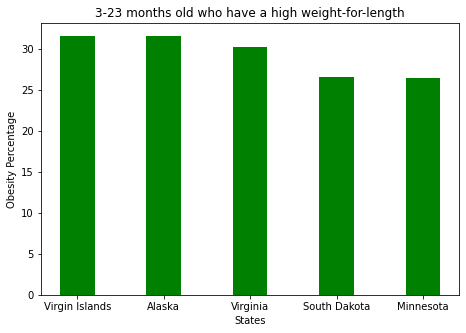

In [23]:
fig = plt.figure(figsize = (7.5, 5))

plt.bar(data1['LocationDesc'], data1['Data_Value'], color ='green',
        width = 0.4)
 
plt.xlabel("States")
plt.ylabel("Obesity Percentage")
plt.title("3-23 months old who have a high weight-for-length")
plt.show()

### Plotting the bar chart for category 2

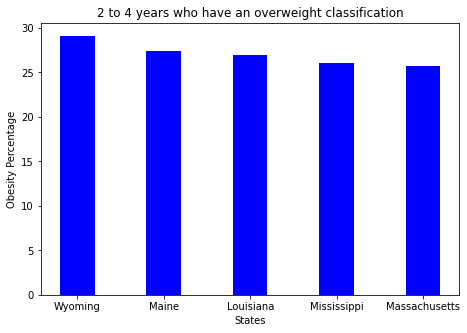

In [24]:
fig = plt.figure(figsize = (7.5, 5))

plt.bar(data2['LocationDesc'], data2['Data_Value'], color ='blue',
        width = 0.4)

plt.xlabel("States")
plt.ylabel("Obesity Percentage")
plt.title("2 to 4 years who have an overweight classification")
plt.show()

### Plotting the line chart for category 3

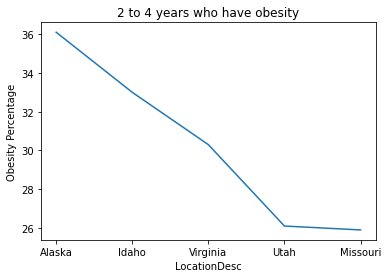

In [30]:
sns.lineplot(x='LocationDesc', y='Data_Value', data=top_states_cat3)
plt.title("2 to 4 years who have obesity")
plt.ylabel("Obesity Percentage")
plt.show()